In [1]:
from IPython.display import Image
from file_reader import read_obj, center_origin

ImportError: cannot import name 'read_obj' from 'file_reader' (C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\file_reader\__init__.py)

# Camera et maillages

## AABB

### Exercice : calculer l'AABB de maillages

Soit le maillage stocké dans le fichier **"meshes/cat.obj"**

Le programme suivant extrait la liste de tous les sommets et facettes de ce maillage

*Exécutez ce programme*


In [3]:

# lire le fichier meshes/cat.obj, affiche le nombre de vertex et de faces triangulaires
file = r'meshes/cat.obj'
vertices, faces = read_obj(file)
vertices = center_origin(vertices)
# affiche le nom du fichier et les décomptes
print(f'file : {file}')
print(f'vertices : {len(vertices)}')
print(f'triangles : {len(faces)}')

file : meshes/cat.obj
vertices : 1136
triangles : 2082


Écrivez la fonction ```AABB()``` qui retourne les 2 points extrémités de la boite englobante AABB pour ce maillage

Pour le moment, la fonction retourne 2 points (0,0,0) et (0,0,0), à vous de compléter le code

In [10]:
def AABB(vertex_list):
    # compute the AABB of the mesh
    # return 2 points : the min and max of the AABB
    min_bb = (0,0,0)
    max_bb = (0,0,0)
    
    return (min_bb,max_bb)

### Visualisation : exécutez le programme suivant pour visualiser l'AABB calculée

Le maillage de l'objet 'cat' est affiché en noir, son AABB apparaîtra en rouge


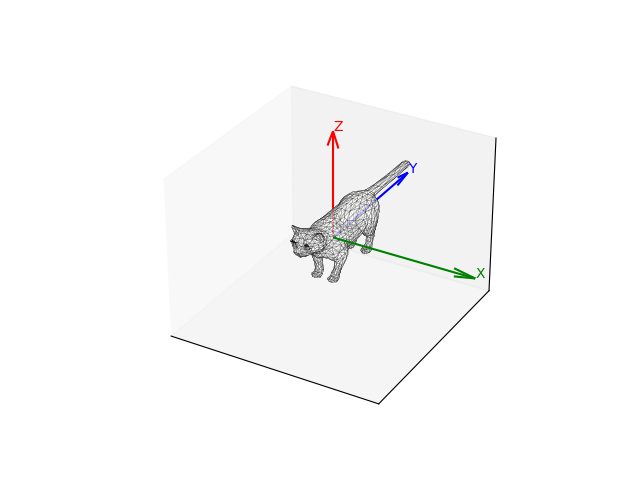

In [11]:
%matplotlib ipympl

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

bounding_box = AABB(vertices)


import geom_tools as gt
# create a plot to display the mesh and its AABB
import numpy as np
import matplotlib.pyplot as plt

# plot configuration
fig, ax = gt.configure_plot()
# prepare the mesh data for display (scale and rotate)
v = np.array(vertices)
bb = np.array(bounding_box)
v,bb = gt.scale_and_rotate(v,bb)
# draw the mesh using matplotlib functions
polys = [[v[f, :] for f in face] for face in faces]
ax.add_collection3d(Poly3DCollection(polys, facecolors='white', linewidths=0.1, edgecolors='k', alpha=0.5))
# draw the AABB
_bb = gt.draw_bounding_box(ax,bb)

# display the plot
plt.draw()
plt.show()


### Exercice : mise à jour de l'AABB après rotation

On considère le maillage précédent, on souhaite calculer l'AABB après une rotation (ici autour de l'axe Z)

Écrivez la fonction ```AABB_after_rotation()``` qui retourne les 2 points extrémités de la boite englobante AABB pour ce maillage après rotation

Pour le moment, la fonction retourne les mêmes points que l'AABB avant rotation, à vous de compléter le code

In [12]:
def rotate_z(v, angle):
    c = np.cos(angle)
    s = np.sin(angle)
    R = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])
    return np.dot(R, v.T).T

def AABB_after_rotation(bb, angle):
    # step 1 : create a list of 8 points from the 2 points of the AABB
    r_points = []
    points=np.array([[bb[0][0], bb[0][1], bb[0][2]],
                    [bb[0][0], bb[0][1], bb[1][2]],
                    [bb[0][0], bb[1][1], bb[0][2]],
                    [bb[0][0], bb[1][1], bb[1][2]],
                    [bb[1][0], bb[0][1], bb[0][2]],
                    [bb[1][0], bb[0][1], bb[1][2]],
                    [bb[1][0], bb[1][1], bb[0][2]],
                    [bb[1][0], bb[1][1], bb[1][2]]])
    
    # step 2 : rotate each point around the Z axis
    for p in points:
        r_points.append(rotate_z(p,angle))
    # step 3 : compute the new AABB from the 8 rotated points

    
    return (bb[0],bb[1])

### Visualisation : exécutez le programme suivant pour visualiser l'AABB après rotation

Le maillage de l'objet 'cat' est affiché en noir, son AABB apparaîtra en rouge

Le diagramme est interactif, vous pouvez modifier l'angle de rotation pour observer l'AABB après rotation

interactive(children=(FloatSlider(value=0.0, description='angle', max=3.141592653589793, step=0.26179938779914…

<function __main__.display_mesh_and_AABB(vertices, faces, bounding_box, angle=0.0)>

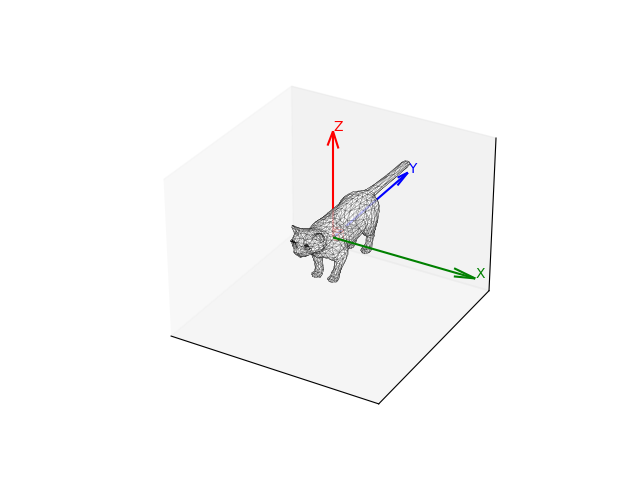

In [14]:
%matplotlib ipympl
from ipywidgets import interact, fixed
import geom_tools as gt
# plot configuration
fig, ax = gt.configure_plot()
# prepare the mesh data for display (scale and rotate)
v = np.array(vertices)
bb = np.array(bounding_box)
v,bb = gt.scale_and_rotate(v,bb)
# draw the mesh
polys = [[v[f, :] for f in face] for face in faces]
_mesh = ax.add_collection3d(Poly3DCollection(polys, facecolors='white', linewidths=0.1, edgecolors='k', alpha=0.5))# draw the AABB
_bb=[]
corners = np.array([[bb[0][0], bb[0][1], bb[0][2]],
                    [bb[0][0], bb[0][1], bb[1][2]],
                    [bb[0][0], bb[1][1], bb[0][2]],
                    [bb[0][0], bb[1][1], bb[1][2]],
                    [bb[1][0], bb[0][1], bb[0][2]],
                    [bb[1][0], bb[0][1], bb[1][2]],
                    [bb[1][0], bb[1][1], bb[0][2]],
                    [bb[1][0], bb[1][1], bb[1][2]]])
# draw the bounding box
# draw the rectangle with minimum z value
_bb += ax.plot(corners[[0, 1, 3, 2, 0], 0], corners[[0, 1, 3, 2, 0], 1], corners[[0, 1, 3, 2, 0], 2], 'r', lw=2)
# draw the rectangle with maximum z value
_bb += ax.plot(corners[[4, 5, 7, 6, 4], 0], corners[[4, 5, 7, 6, 4], 1], corners[[4, 5, 7, 6, 4], 2], 'r', lw=2)
# add text fields for the 2 points of the AABB with data of the 2 points
_bb_text0= ax.text(bb[0][0], bb[0][1], bb[0][2], "E0", color='r')
_bb_text1= ax.text(bb[1][0], bb[1][1], bb[1][2], "E1", color='r')
for i in range(4):
    _bb += ax.plot([corners[i, 0], corners[i + 4, 0]], [corners[i, 1], corners[i + 4, 1]],
            [corners[i, 2], corners[i + 4, 2]], 'r', lw=2)


def rotate_z(v, angle):
    v=np.array(v)
    c = np.cos(angle)
    s = np.sin(angle)
    R = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])
    return np.dot(R, v.T).T

def display_mesh_and_AABB(vertices, faces, bounding_box, angle=0.0):
    # create a plot to display the mesh and its AABB
    import numpy as np
    import matplotlib.pyplot as plt
    verts=rotate_z(vertices, angle)
    bbox = AABB_after_rotation(bounding_box, angle)
    # prepare the mesh data for display (scale and rotate)
    v = np.array(verts)
    bb = np.array(bbox)
    v,bb = gt.scale_and_rotate(v,bb)
    # draw the mesh
        #update the mesh
    polys = [[v[f, :] for f in face] for face in faces]
    _mesh.set_verts(polys)
    #update _bb from bb 
    # compute the 8 points of the new AABB from bb
    corners = np.array([[bb[0][0], bb[0][1], bb[0][2]],
                    [bb[0][0], bb[0][1], bb[1][2]],
                    [bb[0][0], bb[1][1], bb[0][2]],
                    [bb[0][0], bb[1][1], bb[1][2]],
                    [bb[1][0], bb[0][1], bb[0][2]],
                    [bb[1][0], bb[0][1], bb[1][2]],
                    [bb[1][0], bb[1][1], bb[0][2]],
                    [bb[1][0], bb[1][1], bb[1][2]]])

    # update the 2 rectangles of the AABB
    _bb[0].set_data(corners[[0, 1, 3, 2, 0], 0], corners[[0, 1, 3, 2, 0], 1])
    _bb[0].set_3d_properties(corners[[0, 1, 3, 2, 0], 2])
    _bb[1].set_data(corners[[4, 5, 7, 6, 4], 0], corners[[4, 5, 7, 6, 4], 1])
    _bb[1].set_3d_properties(corners[[4, 5, 7, 6, 4], 2])
    for i in range(4):
        _bb[i+2].set_data([corners[i, 0], corners[i + 4, 0]], [corners[i, 1], corners[i + 4, 1]])
        _bb[i+2].set_3d_properties([corners[i, 2], corners[i + 4, 2]])
    
    _bb_text0.set_position((bb[0][0], bb[0][1]))
    _bb_text0.set_3d_properties(bb[0][2])
    _bb_text1.set_position((bb[1][0], bb[1][1]))
    _bb_text1.set_3d_properties(bb[1][2])
    fig.canvas.draw_idle()

fixed_vertices = vertices
fixed_faces = faces
fixed_bounding_box = bounding_box
interact(display_mesh_and_AABB, angle=(0,np.pi,np.pi/12), vertices=fixed(fixed_vertices), faces=fixed(fixed_faces), bounding_box=fixed(fixed_bounding_box))

## Camera, Frustum

### Exercice : caractéristiques de la caméra, plans de frustum

On considère une caméra caractérisée par les paramètres suivants :
near = 1.0, far = 100.0, fov = 60° ( $\frac{2.\pi}{3}$ rad), aspect = $\frac{16}{9}$

1) Calculez les paramètres width et height de la caméra, à partir de fov et aspect

2) Donnez les 4 points de la base du frustum (near) dans le repère de la caméra

3) Donnez les 4 points du sommet du frustum (far) dans le repère de la caméra
*Astuce : utilisez le théorème de Thalès d'après le schéma suivant*

![Thales](images/frustum.png)

3) On cherche les équations des 4 autres plans du frustum : left, right, top, bottom
*rappel* : un plan $P$ étant défini par une normale $\overrightarrow{n}=(n_x, n_y,n_z)$ et un point $A(x_A,y_A,z_A)$
Son équation est de la forme $n_x.x+n_y.y+n_z.z+d=0$ avec $d=-n_x.x_A-n_y.y_A-n_z.z_A$

3.a) En s'inspirant des normales à un triangle, quelle est la normale à un plan dont on connaît 3 points $A,B,C$ ?

*mes notes d'exercice*

---





### Application : plans de frustum

Écrivez la fonction ```frustum_points()``` qui retourne les 4 points de la base du frustum (near) et les 4 points du sommet du frustum (far) dans le repère de la caméra

Pour le moment, la fonction retourne des points (0,0,0), à vous de compléter le code

Le diagramme est interactif, vous pouvez modifier les paramètres de la caméra pour observer les plans de frustum

Pour ce faire : consultez le [blog de David Lively](http://davidlively.com/programming/graphics/frustum-calculation-and-culling-hopefully-demystified/)

attention à bien utiliser $Z_{near}$ et $Z_{far}$ pour les calculs des points de near et far, donc il faut adpater les formules de $hh$ et $hw$ en conséquence

In [15]:
# ecrivez la fonction qui calcule les 4 points du plan near et les 4 points du plan far à partir des paramètres de la caméra : near, far, fov, aspect
def frustum_points(near, far, fov, aspect):
    # compute the 4 near plane points from bottom left corner to top left corner in the camera space
    return np.array([[(0.0,0.0,0.0),(0.0,0.0,0.0),(0.0,0.0,0.0),(0.0,0.0,0.0)],[(0.0,0.0,0.0),(0.0,0.0,0.0),(0.0,0.0,0.0),(0.0,0.0,0.0)]])

interactive(children=(IntSlider(value=25, description='near', max=50, min=1), IntSlider(value=300, description…

<function __main__.update_frustum(near, far, fov, aspect)>

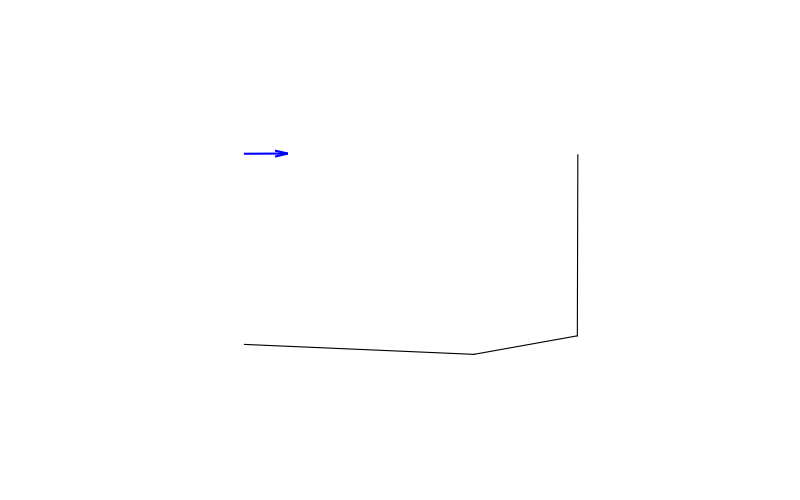

In [16]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

fig = plt.figure()
fig.set_size_inches(8,5)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
#remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
crange = 500
ax.set_xlim(-crange, 0)
ax.set_ylim(-crange, 0)
ax.set_zlim(-crange, 0)
# switch 3D axes to match the camera space : Z axis is left, Y axis is up, X axis is front
# set the display of the ax to match the camera space
ax.view_init(elev=2, azim=117)
#remove the background for better visibility
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# remove all edges
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

# Z->Y Y->X X->Z
Xaxis, Yaxis, Zaxis = (0,1,2)
# indices des axes à afficher
ix=Zaxis
iy=Xaxis
iz=Yaxis

# 
# add a blue quiver line along Z axis
ax.quiver(0, -100*int(iz==0), 0, -100*int(iz==1), 0, -100*int(iz==2), color='b')

# Initialize the frustum plots
near_points, far_points = frustum_points(1.0, 100.0, np.pi/3, 16/9)
# draw 4 green lines between (0,0,0) and each of the 4 near points
camera_lines = [ax.plot([0, near_points[i,ix]], [0, near_points[i,iy]], [0, near_points[i,iz]], 'r-')[0] for i in range(4)]
# draw a rectangle from the 4 near points
near_points = np.vstack([near_points, near_points[0]])
far_points = np.vstack([far_points, far_points[0]])
frustum_near, = ax.plot(near_points[:,ix], near_points[:,iy], near_points[:,iz], 'g-')
frustum_far, = ax.plot(far_points[:,ix], far_points[:,iy], far_points[:,iz], 'g-')
frustum_lines = [ax.plot([near_points[i,ix], far_points[i,ix]], [near_points[i,iy], far_points[i,iy]], [near_points[i,iz], far_points[i,iz]], 'g-')[0] for i in range(4)]
#plt.show()
def update_frustum(near, far, fov, aspect):
    # Prepare the frustum data for display
    near_points, far_points = frustum_points(near, far, fov, aspect)
    near_points = np.vstack([near_points, near_points[0]])
    far_points = np.vstack([far_points, far_points[0]])
    # Update the frustum plots
    #update the 4 green lines between (0,0,0) and the 4 near points
    camera_lines[0].set_data([0, near_points[0,ix]], [0, near_points[0,iy]])
    camera_lines[0].set_3d_properties([0, near_points[0,iz]])
    camera_lines[1].set_data([0, near_points[1,ix]], [0, near_points[1,iy]])
    camera_lines[1].set_3d_properties([0, near_points[1,iz]])
    camera_lines[2].set_data([0, near_points[2,ix]], [0, near_points[2,iy]])
    camera_lines[2].set_3d_properties([0, near_points[2,iz]])
    camera_lines[3].set_data([0, near_points[3,ix]], [0, near_points[3,iy]])
    camera_lines[3].set_3d_properties([0, near_points[3,iz]])
    
    frustum_near.set_data(near_points[:,ix], near_points[:,iy])
    frustum_near.set_3d_properties(near_points[:,iz])
    frustum_far.set_data(far_points[:,ix], far_points[:,iy])
    frustum_far.set_3d_properties(far_points[:,iz])
    for i in range(4):
        frustum_lines[i].set_data([near_points[i,ix], far_points[i,ix]], [near_points[i,iy], far_points[i,iy]])
        frustum_lines[i].set_3d_properties([near_points[i,iz], far_points[i,iz]])
    
    # Redraw the plot
    fig.canvas.draw_idle()


    
interact(update_frustum, near=(1,50,1), far=(100,500,20), fov=(np.pi/6,3*np.pi/6,np.pi/18), aspect=(4/3,16/9,1/9))